# Code Challenge - Task 3: Model Building and Interpretation

***
*Author: Kadriye Nur Bakirci*
***
Contact regarding the code: nur.bakirci@gmail.com
***

This notebook solves data cleaning and dataset preparation task given 3 tabular datasets.

This notebook is divided into 7 main sections.



1.   **Environment Setup**
2.   **Data Loading**
3.   **Descriptive Statistcs**
4.   **Data Preparation**
5.   **Feature Engineering**
6.   **Correlations**
7.   **Modelling**

[Datasets Location](https://github.com/kadnur/DataScienceProject/tree/main/Data)

## Environment Setup


### Import Libraries

General Use Libraries

In [180]:
# Import important libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define some rules of displaying DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', None)

### Import the Data

Clone repository containing the data.

In [134]:
# Clone the repo containing the raw data
!git clone -l -s https://github.com/kadnur/DataScienceProject.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 33 (delta 9), reused 12 (delta 1), pack-reused 0
Receiving objects: 100% (33/33), 1.85 MiB | 19.52 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [135]:
# Move to the relative path containing the cloned repo's data
%cd cloned-repo/Data
!ls

/content/cloned-repo/Data/cloned-repo/Data/cloned-repo/Data/cloned-repo/Data
sales.csv  sample_sales_data.csv  sensor_stock_levels.csv  sensor_storage_temperature.csv


## Data loading

Convert the dataset files into Pandas Dataframes.

In [136]:
# Read  sales data csv data file
Sales = pd.read_csv('sales.csv')

In [137]:
# Read stock data csv data file
Stock = pd.read_csv('sensor_stock_levels.csv')

In [138]:
# Read tempature data csv data file
Tempature = pd.read_csv('sensor_storage_temperature.csv')

Explore the first 10 instances of datasets.

In [139]:
# Check the head as a sanity check of correct loading of the data
Sales.head(10)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
5,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash
6,6,4997b1ae-f5aa-4b9f-8fc8-22ad8f19837c,2022-03-07 19:36:57,14736243-d346-438f-9535-d80fcb9f3882,fruit,standard,1.49,4,5.96,e-wallet
7,7,bfffee68-0736-42af-bd3e-4ca77541b0d6,2022-03-07 19:03:20,0ddc2379-adba-4fb0-aa97-19fcafc738a1,fruit,basic,3.99,4,15.96,credit card
8,8,ce50e984-90cd-4b47-8537-3a4e32e6d314,2022-03-07 11:34:32,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,non-member,3.99,1,3.99,credit card
9,9,f0700cc9-e6f5-4b9a-add4-05e64b4f495b,2022-03-07 09:20:12,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,premium,0.49,3,1.47,e-wallet


In [140]:
# Check the head as a sanity check of correct loading of the data
Stock.head(10)

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22
5,5,98550364-b9c1-42e2-8852-a0e884daf960,2022-03-01 14:51:16,0f493675-d59d-45dd-9406-084932bf41c1,0.04
6,6,35da168d-715e-4ca1-8755-d317cee4e9b9,2022-03-03 12:59:14,e22ea344-cea3-42fe-bb97-9a99fa7c6987,0.03
7,7,b00838b1-59a6-4f85-81fe-986ed0e46fc2,2022-03-01 12:35:30,a3ec02dd-a6be-4fc0-a8d1-ef34a2addca0,0.56
8,8,4478f269-e631-465f-b490-0d8629dd138d,2022-03-07 13:45:06,21f8aa00-bc6e-4c9d-8acf-2d3bb740f30b,0.89
9,9,ca95cb50-26cb-4d87-8819-baefd68de5d9,2022-03-05 09:18:11,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.99


In [141]:
# Check the head as a sanity check of correct loading of the data
Sales.head(10)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
5,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash
6,6,4997b1ae-f5aa-4b9f-8fc8-22ad8f19837c,2022-03-07 19:36:57,14736243-d346-438f-9535-d80fcb9f3882,fruit,standard,1.49,4,5.96,e-wallet
7,7,bfffee68-0736-42af-bd3e-4ca77541b0d6,2022-03-07 19:03:20,0ddc2379-adba-4fb0-aa97-19fcafc738a1,fruit,basic,3.99,4,15.96,credit card
8,8,ce50e984-90cd-4b47-8537-3a4e32e6d314,2022-03-07 11:34:32,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,non-member,3.99,1,3.99,credit card
9,9,f0700cc9-e6f5-4b9a-add4-05e64b4f495b,2022-03-07 09:20:12,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,premium,0.49,3,1.47,e-wallet


In [142]:
# Check the head as a sanity check of correct loading of the data
Tempature.head(10)

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38
5,5,125583af-e280-4627-9cc6-62413af94c6b,2022-03-06 09:39:53,0.04
6,6,3ef1f91d-f7ef-4bf2-a0f7-2c3720a7432c,2022-03-05 19:21:53,-28.34
7,7,5131c3ed-4f6b-4f52-93c9-fa2717499a80,2022-03-03 19:09:48,-2.47
8,8,0fd6edd9-36d3-4c7c-8184-53e746365067,2022-03-05 15:45:46,2.48
9,9,04766f4f-a431-4853-92c9-a6b28b7f7abb,2022-03-04 15:18:25,-3.03


Here we saw that there is a one issue of data loading which is unnamed column. Let's drop this column.

In [143]:
# Drop unnamed column
datasets = [Sales, Stock, Tempature]
for dataset in datasets:
  if "Unnamed: 0" in dataset.columns:
    dataset = dataset.drop("Unnamed: 0", axis=1,inplace=True)

In [144]:
# Check DataFrame
Sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [145]:
# Check DataFrame
Stock.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [146]:
# Check DataFrame
Tempature.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


---

## Descriptive statistics


### Sales DataFrame

Get an overall insight on Sales dataframe content.

In [147]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{Sales.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{Sales.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{Sales.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{Sales.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{Sales.describe(include = object).transpose()}')

Dataset shape:
(7829, 9)

Dataset attributes:
Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB
Dataset general information:
None

Dataset description:
Numerical Data
             count       mean        std   min   25%   

From above statistical analysis, we can say there is no null value in the dataset but we can do sanity check.

Do a direct call for printing missing values.

In [148]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((Sales.isnull().sum() / len(Sales))) * 100}\n')

Percentage of Null Values per Feature
transaction_id    0.0
timestamp         0.0
product_id        0.0
category          0.0
customer_type     0.0
unit_price        0.0
quantity          0.0
total             0.0
payment_type      0.0
dtype: float64



Check the number of duplicated rows for DataFrame.

In [149]:
# Print the number of duplicated rows for Sales
print(f'The number of duplicated rows in Sales is {Sales.duplicated().sum()} out of {Sales.shape[0]} rows.')

The number of duplicated rows in Sales is 0 out of 7829 rows.


### Stock DataFrame

Get an overall insight on Stock dataframe content.

In [150]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{Stock.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{Stock.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{Stock.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{Stock.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{Stock.describe(include = object).transpose()}')

Dataset shape:
(15000, 4)

Dataset attributes:
Index(['id', 'timestamp', 'product_id', 'estimated_stock_pct'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB
Dataset general information:
None

Dataset description:
Numerical Data
                       count      mean       std   min   25%  50%   75%  max
estimated_stock_pct  15000.0  0.502735  0.286842  0.01  0.26  0.5  0.75  1.0

Dataset description:
Categorical Data
            count unique                                   top freq
id          15000  15000  4220e505-c247-478d-9831-6b9f87a4488a    1
timestamp 

From above statistical analysis, we can say there is no null value in the dataset but we can do sanity check.

Do a direct call for printing missing values.

In [151]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((Stock.isnull().sum() / len(Stock))) * 100}\n')

Percentage of Null Values per Feature
id                     0.0
timestamp              0.0
product_id             0.0
estimated_stock_pct    0.0
dtype: float64



Check the number of duplicated rows for DataFrame.

In [152]:
# Print the number of duplicated rows for Stock
print(f'The number of duplicated rows in Stock is {Stock.duplicated().sum()} out of {Stock.shape[0]} rows.')

The number of duplicated rows in Stock is 0 out of 15000 rows.


### Tempature DataFrame

Get an overall insight on Tempature dataframe content.

In [153]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{Tempature.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{Tempature.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{Tempature.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{Tempature.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{Tempature.describe(include = object).transpose()}')

Dataset shape:
(23890, 3)

Dataset attributes:
Index(['id', 'timestamp', 'temperature'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB
Dataset general information:
None

Dataset description:
Numerical Data
               count      mean        std    min   25%  50%   75%    max
temperature  23890.0 -0.207075  11.217649 -30.99 -2.86 -1.0  1.84  34.99

Dataset description:
Categorical Data
           count unique                                   top freq
id         23890  23890  d1ca1ef8-0eac-42fc-af80-97106efc7b13    1
timestamp  23890  23890                   2022-03-07 15:55:20    1


From above statistical analysis, we can say there is no null value in the dataset but we can do sanity check.

Do a direct call for printing missing values.

In [154]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((Tempature.isnull().sum() / len(Tempature))) * 100}\n')

Percentage of Null Values per Feature
id             0.0
timestamp      0.0
temperature    0.0
dtype: float64



Check the number of duplicated rows for DataFrame.

In [155]:
# Print the number of duplicated rows for Tempature
print(f'The number of duplicated rows in Tempature is {Tempature.duplicated().sum()} out of {Tempature.shape[0]} rows.')

The number of duplicated rows in Tempature is 0 out of 23890 rows.


---

## Data Preparation

Before making any further changes it is a good idea to create a copy of each DataFrame so that we can keep raw datasets untouched.

In [156]:
# Create a copy of each dataset
df_sales = Sales.copy()
df_stock = Stock.copy()
df_temp = Tempature.copy()

### Change Data Type

Above analysis, we saw that the "timestamp" feature data type is not correct. Let's convert this column type to the datetime.

In [157]:
# Create a function to change datatype
def convert_to_datetime(datas: list = None, column: str = None):
  for data in datas:
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d %H:%M:%S')
  return data

# Call the function
convert_to_datetime(datas=[df_sales, df_stock, df_temp], column='timestamp')

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38
...,...,...,...
23885,17bcff56-9965-4e9f-ad5f-107f0f3be93f,2022-03-01 10:40:43,-1.46
23886,51d4eb44-04bd-4d6a-b777-0653bc173303,2022-03-05 17:07:49,-19.37
23887,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,2022-03-01 16:15:41,-2.89
23888,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,2022-03-07 14:44:52,-2.56


In [158]:
# Check the transformation is correctly done
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


### Merge Datasets

Currently we have 3 datasets. In order to include all of this data within a predictive model, we need to merge them together into 1 dataframe.

If we revisit the problem statement:

```
“Can we accurately predict the stock levels of products, based on sales data and sensor data,
on an hourly basis in order to more intelligently procure products from our suppliers.”
```

The client indicates that they want the model to predict on an hourly basis. Looking at the data model, we can see that only column that we can use to merge the 3 datasets together is `timestamp`.

So, we must first transform the `timestamp` column in all 3 datasets to be based on the hour of the day, then we can merge the datasets together.

In [159]:
# Create a function to convert timestamp to hourly for all datasets
def convert_timestamp_to_hourly(datas: list = None, column: str = None):
  for data in datas:
    new_ts = data[column].tolist()
    new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
    new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
    data[column] = new_ts
  return data

# Call the function
convert_timestamp_to_hourly(datas=[df_sales, df_stock, df_temp], column='timestamp')

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38
...,...,...,...
23885,17bcff56-9965-4e9f-ad5f-107f0f3be93f,2022-03-01 10:00:00,-1.46
23886,51d4eb44-04bd-4d6a-b777-0653bc173303,2022-03-05 17:00:00,-19.37
23887,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,2022-03-01 16:00:00,-2.89
23888,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,2022-03-07 14:00:00,-2.56


In [160]:
# Check the transformation is correctly done
df_stock.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


For the `sales` data, we want to group the data by `timestamp` but also by `product_id`. When we aggregate, we must choose which columns to aggregate by the grouping. For now, let's aggregate quantity.

In [161]:
# Group sales data
sales_agg = df_sales.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


We now have an aggregated sales data where each row represents a unique combination of hour during which the sales took place from that weeks worth of data and the product_id.

For the stock data, we want to group it in the same way and aggregate the `estimated_stock_pct`.

In [162]:
# Group stock data
stock_agg = df_stock.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


This shows us the average stock percentage of each product at unique hours within the week of sample data.

Finally, for the temperature data, product_id does not exist in this table, so we simply need to group by timestamp and aggregate the `temperature`.

In [163]:
# Group tempature data
temp_agg = df_temp.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


This gives us the average temperature of the storage facility where the produce is stored in the warehouse by unique hours during the week. Now, we are ready to merge our data. We will use the `stock_agg` table as our base table, and we will merge our other 2 tables onto this.

In [164]:
# Merge stock and sales datasets
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


Get an overall insight on Merged dataframe content.

In [165]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{merged_df.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{merged_df.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{merged_df.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{merged_df.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{merged_df.describe(include = object).transpose()}')

Dataset shape:
(10845, 5)

Dataset attributes:
Index(['timestamp', 'product_id', 'estimated_stock_pct', 'quantity',
       'temperature'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB
Dataset general information:
None

Dataset description:
Numerical Data
                       count      mean       std      min       25%       50%  \
estimated_stock_pct  10845.0  0.505130  0.264519  0.01000  0.300000  0.500000   
quantity              306

We have some null values. These need to be treated before we can build a predictive model. The column that features some null values is `quantity`. We can assume that if there is a null value for this column, it represents that there were 0 sales of this product within this hour. So, lets fill this columns null values with 0, however, we should verify this with the client, in order to make sure we're not making any assumptions by filling these null values with 0.

In [166]:
# Fill missing values
merged_df['quantity'] = merged_df['quantity'].fillna(0)
# Check filling values are filled
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


We can combine some more features onto this table too, including `category` and `unit_price`.

In [167]:
# Choose category feature from sales dataset
product_categories = df_sales[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

# Choose unit price feature from sales dataset
product_price = df_sales[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [168]:
# Merge all of datasets
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df = merged_df.merge(product_price, on="product_id", how="left")
# Check DataFrame
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [169]:
# Check dataset content again
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


---

## Feature Engineering

We have our cleaned and merged data. Now we must transform this data so that the columns are in a suitable format for a machine learning model. In other terms, every column must be numeric. There are some models that will accept categorical features, but for this, we will use a model that requires numeric features.

Let's first engineer the `timestamp` column. In it's current form, it is not very useful for a machine learning model. Since it's a datetime datatype, we can explode this column into day of week, day of month and hour to name a few.

In [170]:
# Create new features
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour

# Drop time stamp colum
merged_df.drop(columns=['timestamp'], inplace=True)

# Check dataset
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


The next column that we can engineer is the `category` column. In its current form it is categorical. We can convert it into numeric by creating dummy variables from this categorical column.

In [171]:
# Create dummy values
merged_df = pd.get_dummies(merged_df, columns=['category'])
# Check dataset
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,category_cleaning products,category_condiments and sauces,category_dairy,category_frozen,category_fruit,category_kitchen,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Since each row represents a unique combination of product_id and timestamp by hour, and the product_id is simply an ID column, it will add no value by including it in the predictive model. Hence, we shall remove it from the modeling process.

In [172]:
# Drop product id column
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,category_cleaning products,category_condiments and sauces,category_dairy,category_frozen,category_fruit,category_kitchen,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Sales velocity and stock turnover are metrics that provide insights into the efficiency and performance of inventory management.

In [173]:
# Calculate sales velocity and stock turnover
merged_df['sales_velocity'] = merged_df['quantity'] / merged_df['estimated_stock_pct']

# Calculate stock turnover
merged_df['cogs'] = merged_df['quantity'] * merged_df['unit_price']
merged_df['stock_turnover'] = merged_df['cogs'] / merged_df['estimated_stock_pct']

In [174]:
# Drop cogs column
merged_df.drop(columns=['cogs'], inplace=True)
# Check DataFrame
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,category_cleaning products,category_condiments and sauces,category_dairy,category_frozen,category_fruit,category_kitchen,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,sales_velocity,stock_turnover
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.370787,37.719101
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21.428571,31.928571
2,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000
3,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000
4,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000,0.000000


---

## Correlations

In [175]:
# Have a look at the correlations
corr_matrix = merged_df.corr()
corr_matrix["estimated_stock_pct"].sort_values(ascending=False)

estimated_stock_pct               1.000000
category_baked goods              0.014621
category_refrigerated items       0.013709
quantity                          0.012929
timestamp_hour                    0.012894
category_fruit                    0.010750
temperature                       0.007955
category_condiments and sauces    0.006871
category_cheese                   0.006154
category_spices and herbs         0.006151
category_cleaning products        0.003647
category_vegetables               0.003545
category_medicine                 0.002743
category_pets                     0.002564
category_baking                   0.002043
timestamp_day_of_month            0.001786
category_packaged foods           0.000983
category_frozen                   0.000725
category_canned foods            -0.000580
category_dairy                   -0.001516
category_snacks                  -0.003926
category_seafood                 -0.004952
category_baby products           -0.008018
category_pe

---

## Modelling

Now it is time to train a machine learning model. We will use a supervised machine learning model, and we will use `estimated_stock_pct` as the target variable, since the problem statement was focused on being able to predict the stock levels of products on an hourly basis.

Whilst training the machine learning model, we will use cross-validation, which is a technique where we hold back a portion of the dataset for testing in order to compute how well the trained machine learning model is able to predict the target variable.

Finally, to ensure that the trained machine learning model is able to perform robustly, we will want to test it several times on random samples of data, not just once. Hence, we will use a `K-fold` strategy to train the machine learning model on `K` (K is an integer to be decided) random samples of the data.

First, let's create our target variable `y` and independent variables `X`

In [176]:
# Seperate target and independent variables
y = merged_df['estimated_stock_pct']
X = merged_df.drop(columns=['estimated_stock_pct'])
print(X.shape)
print(y.shape)

(10845, 30)
(10845,)


This shows that we have 30 predictor variables that we will train our machine learning model on and 10845 rows of data.

Now let's define how many folds we want to complete during training, and how much of the dataset to assign to training, leaving the rest for test.

Typically, we should leave at least 20% of the data for testing.

In [179]:
K = 10
split = 0.8

accuracy_test = []
accuracy_train = []

for fold in range(0, K):
    # Instantiate algorithm
    model = RandomForestRegressor()
    scaler = StandardScaler()

    # Create training and test samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

    # Scale X data
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model on training data
    trained_model = model.fit(X_train_scaled, y_train)

    # Generate predictions on training and test samples
    y_pred_train = trained_model.predict(X_train_scaled)
    y_pred_test = trained_model.predict(X_test_scaled)

    # Compute MAE for training data
    mae_train = mean_absolute_error(y_true=y_train, y_pred=y_pred_train)
    accuracy_train.append(mae_train)
    print(f"Fold {fold + 1}: Training MAE = {mae_train:.3f}")

    # Compute MAE for test data
    mae_test = mean_absolute_error(y_true=y_test, y_pred=y_pred_test)
    accuracy_test.append(mae_test)
    print(f"Fold {fold + 1}: Test MAE = {mae_test:.3f}")

print(f"Average Training MAE: {(sum(accuracy_train) / len(accuracy_train)):.2f}")
print(f"Average Test MAE: {(sum(accuracy_test) / len(accuracy_test)):.2f}")

Fold 1: Training MAE = 0.070
Fold 1: Test MAE = 0.168
Fold 2: Training MAE = 0.069
Fold 2: Test MAE = 0.168
Fold 3: Training MAE = 0.069
Fold 3: Test MAE = 0.167
Fold 4: Training MAE = 0.070
Fold 4: Test MAE = 0.168
Fold 5: Training MAE = 0.070
Fold 5: Test MAE = 0.167
Fold 6: Training MAE = 0.070
Fold 6: Test MAE = 0.166
Fold 7: Training MAE = 0.070
Fold 7: Test MAE = 0.168
Fold 8: Training MAE = 0.070
Fold 8: Test MAE = 0.167
Fold 9: Training MAE = 0.069
Fold 9: Test MAE = 0.167
Fold 10: Training MAE = 0.070
Fold 10: Test MAE = 0.167
Average Training MAE: 0.07
Average Test MAE: 0.17


The fact that the training and test MAE values are relatively close suggests that  model is not overfitting, as the performance on the test set is similar to the performance on the training set. This indicates that model is generalizing well to unseen data.

We can see that the mean absolute error (MAE) is almost exactly the same each time. This is a good sign, it shows that the performance of the model is consistent across different random samples of the data, which is what we want. In other words, it shows a robust nature.

As a final note, we can use the trained model to intepret which features were signficant when the model was predicting the target variable.

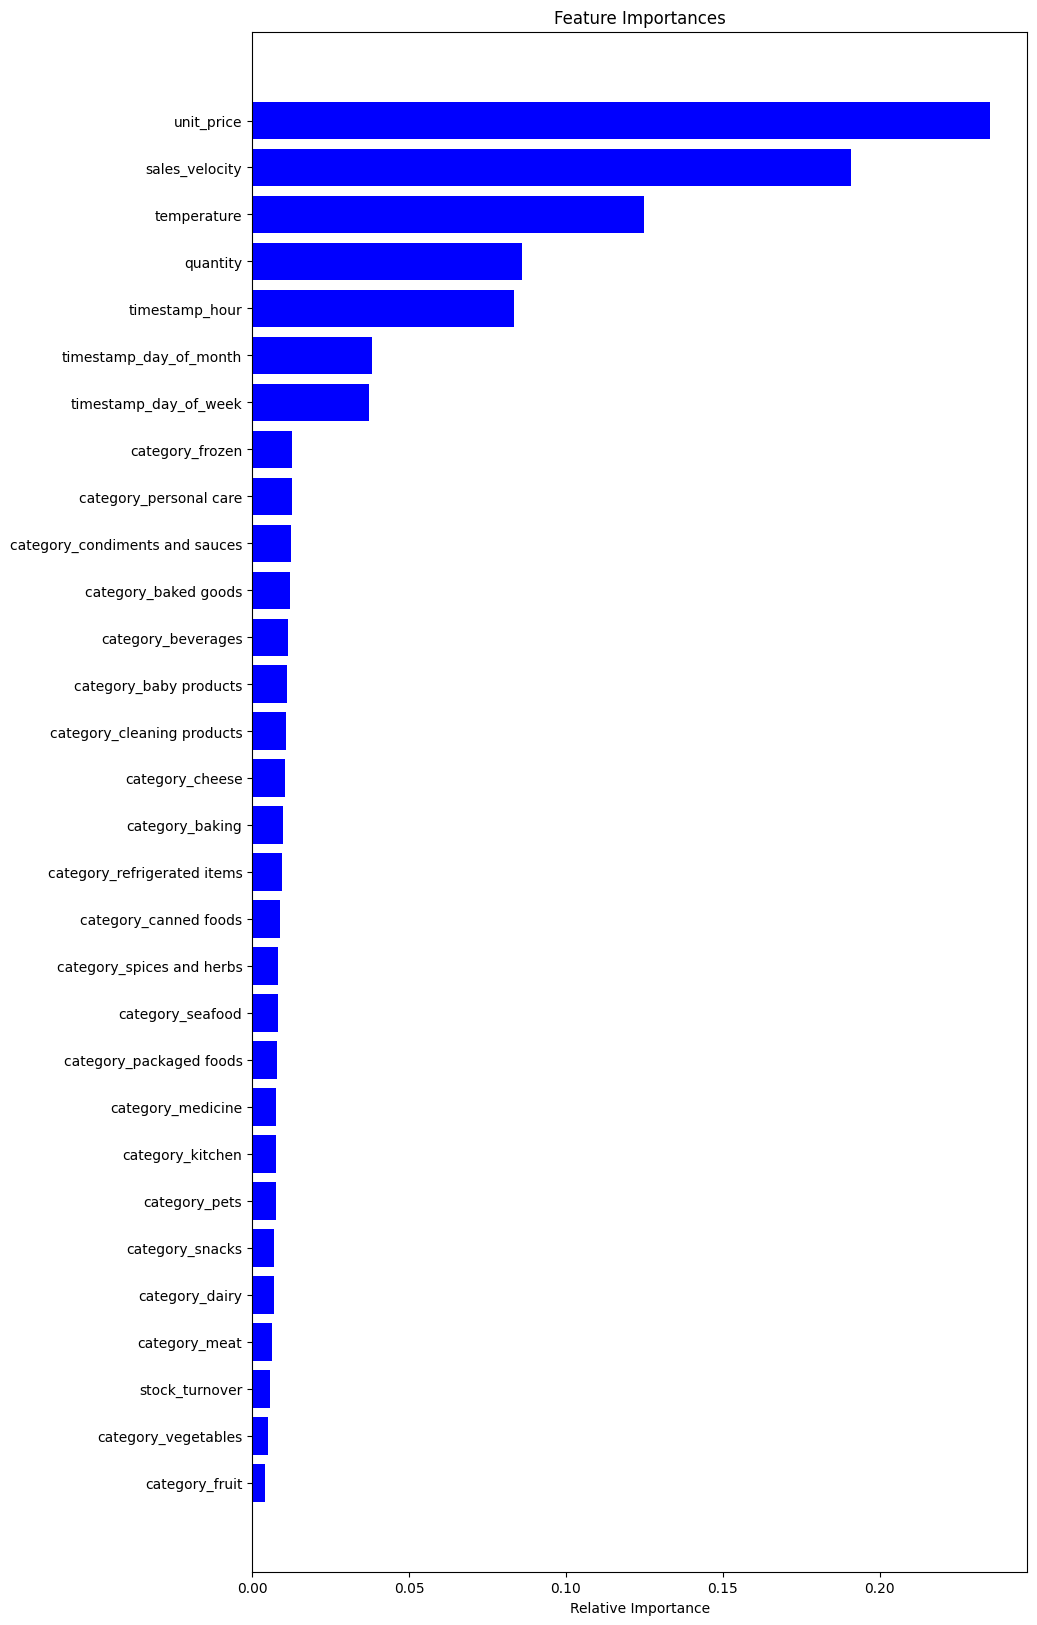

In [181]:
# Plot feature importance
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This feature importance visualisation tells us:

- The product categories were not that important
- The unit price, sales velocity and temperature were important in predicting stock
- The hour of day and quantity was also important for predicting stock

With these insights, we can now report this back to the business